<a href="https://colab.research.google.com/github/Jefferson-Luis/Data-Science-com-Python/blob/main/Modulo_5_Modelagem_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science com Python: Módulo 5 Modelagem e Avaliação dos Resultados 
* Os modelos de machine learning, nas suas três categorias principais: regressão, classificação e clusterização.

Import dos pacotes

In [336]:
# Manipulação de dados

import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Quebra dos dados de train / test
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Modelos de classificação 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Vaidação cruzada
from sklearn.model_selection import cross_val_score

# Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Tuning de hiperparâmetros
from sklearn.model_selection import GridSearchCV



In [165]:
# adicionar algumas configurações de visualizações

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [166]:
metadados = pd.read_excel('metadata.xlsx')

Bases em: Kaggle

In [167]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


In [168]:
df = pd.read_csv('new_train.csv', sep=',')

In [169]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [171]:
df.corr()

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


In [172]:
df['poutcome'].value_counts()

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

Criando uma nova variavel para a modelagem com base em poutcome e previous

In [173]:
df['difficulty'] = -1 # desconhecido
df.loc[(df['poutcome'] == 'success') & (df['previous'].between(0,1)), "difficulty"] = 0 # facil
df.loc[(df['poutcome'] == 'success') & (df['previous'].between(2,4)), "difficulty"] = 1 # médio
df.loc[(df['poutcome'] == 'success') & (df['previous'].between(5,7)), "difficulty"] = 2 # dificil
df.loc[(df['poutcome'] == 'nonexistent') & (df['previous'] > 7), "difficulty"] = 3 # muito dificil
df.loc[(df['poutcome'] == 'failure'), "difficulty"] = 4 # impossivel 

In [174]:
df['difficulty'].value_counts()

-1    28416
 4     3429
 0      697
 1      391
 2       17
Name: difficulty, dtype: int64

ABT - Analytical Base Table

In [175]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'difficulty'],
      dtype='object')

In [176]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
difficulty     0
dtype: int64

In [177]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
difficulty      int64
dtype: object

Separação da Var resposta das variáveis explicativas

In [178]:
explicativas = df.drop(columns = ['y'])

In [179]:
# mostrar ultimos 5

explicativas.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,difficulty
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,-1
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,4
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,-1
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,-1
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,-1


Tratar a variável resp

In [180]:
var_resp = df['y']
var_resp.value_counts()  # verificando quais as variaveis existentes 

no     29238
yes     3712
Name: y, dtype: int64

In [181]:
# fazer .replace onde vai trocar 'no' por 0  |  'yes' por 1

var_resp = var_resp.replace('no',0)
var_resp = var_resp.replace('yes',1)

In [182]:
# conferindo o resultado apos transformação

var_resp.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [183]:
# verificando as outras variáveis

explicativas.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,difficulty
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-1
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,4
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,-1
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-1


# Tratamento variáveis  explicativas categóricas


In [184]:
expl_cat = explicativas[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','difficulty']]

In [185]:
# categoricas = object
# difficulty também 

explicativas.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
difficulty      int64
dtype: object

In [186]:
# separando as variáveis numericas

expl_num = explicativas[['age','duration','campaign','pdays','previous']]

In [187]:
# fazendo o enconding da variaveis categoricas

expl_cat_enconding = pd.get_dummies(expl_cat,
                                    prefix_sep='_',
                                    columns=expl_cat.columns,
                                    drop_first=True)

In [188]:
expl_cat_enconding.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [189]:
explicativas_tratadas = expl_num.merge(expl_cat_enconding,
                                       left_index=True,
                                       right_index=True)

In [190]:
explicativas_tratadas.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
0,49,227,4,999,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,37,202,2,999,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,78,1148,1,999,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,36,120,2,999,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,59,368,2,999,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [191]:
explicativas_tratadas.shape

(32950, 52)

### Feature Selection


In [192]:
# chi2

expl_cat_norm = MinMaxScaler().fit_transform(expl_cat_enconding)
expl_cat_norm


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
chi_selector = SelectKBest(chi2, k=5)
chi_selector.fit(expl_cat_norm, var_resp)

SelectKBest(k=5, score_func=<function chi2 at 0x7f3e6a3cf560>)

In [194]:
chi_support = chi_selector.get_support()
chi_feature = expl_cat_enconding.loc[:,chi_support].columns.tolist()
chi_feature

['month_mar', 'month_oct', 'poutcome_success', 'difficulty_0', 'difficulty_1']

Seleção de variáveis numéricas

In [195]:
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=3, step=1)

In [196]:
rfe_selector.fit(expl_num, var_resp)

RFE(estimator=LogisticRegression(max_iter=200, random_state=42),
    n_features_to_select=3)

In [197]:
ref_support = rfe_selector.get_support()
rfe_feature = expl_num.loc[:,ref_support].columns.tolist()
rfe_feature

['age', 'campaign', 'previous']

Base a ser considerada no processo de modelagem

In [198]:
expl_num_feature_selection = expl_num[['age', 'campaign', 'previous']] 
expl_num_feature_selection.head()

,age,campaign,previous
0,49,4,0
1,37,2,1
2,78,1,0
3,36,2,0
4,59,2,0


In [199]:
expl_cat_feature_selection = expl_cat[['month', 'poutcome', 'difficulty']]
expl_cat_feature_selection.head()

,month,poutcome,difficulty
0,nov,nonexistent,-1
1,nov,failure,4
2,jul,nonexistent,-1
3,may,nonexistent,-1
4,jun,nonexistent,-1


In [200]:
expl_cat_feature_selection = pd.get_dummies(expl_cat_feature_selection, prefix_sep='_',columns=expl_cat_feature_selection.columns, drop_first=True)
expl_cat_feature_selection.head()

,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [201]:
explicativas_modelagem = expl_num_feature_selection.merge(expl_cat_feature_selection,
                                                          left_index=True,
                                                          right_index=True)

In [202]:
explicativas_modelagem.tail() 

,age,campaign,previous,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
32945,28,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
32946,52,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
32947,54,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
32948,29,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
32949,35,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


#Módulo 5: Aula 4

Quebra dos dados entre train/ test

In [203]:
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas_modelagem,
                                                        var_resp,
                                                        test_size=0.3,
                                                        random_state=42)

In [204]:
x_treino.head()

,age,campaign,previous,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
24186,33,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
18087,48,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6950,31,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
8200,40,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
16051,30,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [205]:
x_teste.head()

,age,campaign,previous,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
20628,28,5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4344,38,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
20933,41,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4641,38,4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4638,35,21,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


## O Algoritmo

Para treinamento de um modelo de  ML classico:
* Import do pacote de ML
* Instanciar o obj em memória
* treinamento
* auferir os resultados

In [206]:
# arvore
tree = DecisionTreeClassifier(random_state=42)

In [207]:
tree

DecisionTreeClassifier(random_state=42)

In [208]:
rf= RandomForestClassifier(n_estimators=400,
                           random_state=42)

In [209]:
rf

RandomForestClassifier(n_estimators=400, random_state=42)

In [210]:
gb = GradientBoostingClassifier(n_estimators=400,
                                random_state=42)

In [211]:
gb

GradientBoostingClassifier(n_estimators=400, random_state=42)

In [212]:
tree.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [213]:
rf.fit(x_treino, y_treino)

RandomForestClassifier(n_estimators=400, random_state=42)

In [214]:
gb.fit(x_treino, y_treino)

GradientBoostingClassifier(n_estimators=400, random_state=42)

Acurácia da árvore

In [215]:
# resultado

accuracy_score(y_treino, tree.predict(x_treino))

0.9274658573596358

In [216]:
accuracy_score(y_teste, tree.predict(x_teste))

0.8823469903894791

Acuracia da RandomForest

In [217]:
accuracy_score(y_treino, rf.predict(x_treino))

0.9274658573596358

In [218]:
accuracy_score(y_teste, rf.predict(x_teste))

0.8845725847243298

Acuracia do GradientBoosting

In [219]:
accuracy_score(y_treino, gb.predict(x_treino))

0.9065683936700628

In [220]:
accuracy_score(y_teste, gb.predict(x_teste))

0.8932726353060192

Cross Validation

In [221]:
# validação cruzada 

tree_cv = cross_val_score(estimator=tree,
                          X=x_treino,
                          y=y_treino,
                          cv=3,
                          scoring=make_scorer(accuracy_score))

In [222]:
tree_cv

array([0.88607101, 0.88358481, 0.88358481])

In [223]:
tree_cv = cross_val_score(estimator=tree,
                          X=x_treino,
                          y=y_treino,
                          cv=5,
                          scoring=make_scorer(accuracy_score))

In [224]:
tree_cv

array([0.88792543, 0.89182744, 0.88163885, 0.88424019, 0.88575764])

# Relembrando o treinamento padrão dos algoritmos e observando o quanto os hiperparametros mudam no resultado do algoritmos

In [225]:
x_treino.count()

age                     23065
campaign                23065
previous                23065
month_aug               23065
month_dec               23065
month_jul               23065
month_jun               23065
month_mar               23065
month_may               23065
month_nov               23065
month_oct               23065
month_sep               23065
poutcome_nonexistent    23065
poutcome_success        23065
difficulty_0            23065
difficulty_1            23065
difficulty_2            23065
difficulty_4            23065
dtype: int64

In [226]:
# simulando com valores distintos de 
# criterion=('gini',"entropy") 
# max_depth=(50,100) 
# min_samples_split=(5,50) 
#min_samples_leaf=(40,200)
tree_modificada = DecisionTreeClassifier(criterion="entropy",max_depth=50, min_samples_split=40, min_samples_leaf=5)


In [227]:
tree_modificada.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       min_samples_split=40)

In [228]:
# resultado
accuracy_score(y_treino, tree_modificada.predict(x_treino))

0.9042705397788857

In [229]:
tree_modificada = DecisionTreeClassifier(criterion="entropy",max_depth=100, min_samples_split=200, min_samples_leaf=50)


In [230]:
tree_modificada.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=50,
                       min_samples_split=200)

In [231]:
accuracy_score(y_treino, tree_modificada.predict(x_treino))

0.8997181877303273

In [232]:
accuracy_score(y_teste, tree_modificada.predict(x_teste))

0.8941831057157309

Tuning de hiperparametros

# Passos

1 - import do pacote

2 - Chamada do objeto (estimador)

3 - dicionario com os conjuntos de hiperparametros

4 - chamada do objeto GridSearch

5 - fit (treinamento)

6 - verificar o resultado

In [233]:
# 1 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV

In [234]:
# 2

rf_grid_estimator = RandomForestClassifier()

In [235]:
# 3

rf_grid_dc = {
    'n_estimators':[50,100,200,500],
    'criterion':['gini','entropy'],
    'bootstrap':[True,False],
    'random_state':[42]
}

In [236]:
rf_grid_dc

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'n_estimators': [50, 100, 200, 500],
 'random_state': [42]}

In [237]:
# 4

rf_grid = GridSearchCV(rf_grid_estimator,
                       rf_grid_dc,
                       cv = 2,
                       scoring=make_scorer(accuracy_score))

In [238]:
rf_grid

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(accuracy_score))

In [288]:
# 5

rf_grid.fit(x_treino, y_treino)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(accuracy_score))

In [240]:
rf_grid.best_estimator_

RandomForestClassifier(n_estimators=200, random_state=42)

In [241]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'n_estimators': 200,
 'random_state': 42}

Tuning de Hiperparâmetros explorando demais métricas

# Gradiente Boosting

In [269]:
from sklearn.ensemble import GradientBoostingClassifier


In [270]:
from sklearn.model_selection import GridSearchCV 

In [271]:
gb_grid_estimator = GradientBoostingClassifier()

In [312]:
# 3

gb_grid_dc = {
    'n_estimators':[100,200,500],
    'min_samples_split':[2,40],
    'min_samples_leaf':[2,100],
    'random_state':[42]
}

In [313]:
gb_grid_dc

{'min_samples_leaf': [2, 100],
 'min_samples_split': [2, 40],
 'n_estimators': [100, 200, 500],
 'random_state': [42]}

In [314]:
# 4

gb_grid = GridSearchCV(gb_grid_estimator,
                       gb_grid_dc,
                       scoring=make_scorer(roc_auc_score),
                       cv=5)



In [309]:
# 4 
gb_grid = GridSearchCV(gb_grid_estimator,
                       gb_grid_dc,
                       scoring='roc_auc',
                       cv=5)

# ref.: https://scikit-learn.org/stable/modules/model_evalution.html # scoring-parameter

In [315]:
gb_grid

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': [2, 100],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(roc_auc_score))

In [316]:
gb_grid.fit(x_treino, y_treino)



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': [2, 100],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(roc_auc_score))

In [317]:
gb_grid.best_params_

{'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 42}

In [318]:
gb_grid.best_score_

0.5921775553994446

In [319]:
roc_auc_score(y_teste, gb_grid.predict(x_teste))

0.5992335237348075

Métricas

In [322]:
precision_score(y_teste, gb_grid.predict(x_teste))

0.6212871287128713

In [324]:
recall_score(y_teste, gb_grid.predict(x_teste))

0.21600688468158347

In [326]:
cf_matrix = confusion_matrix(y_teste, gb_grid.predict(x_teste))
cf_matrix

array([[8570,  153],
       [ 911,  251]])

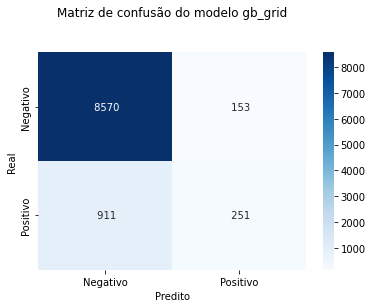

In [328]:

ax = sns.heatmap(cf_matrix,
                 annot=True,
                 cmap='Blues',
                 fmt =' .4g')

ax.set_title('Matriz de confusão do modelo gb_grid\n\n')
ax.set_xlabel('Predito')
ax.set_ylabel('Real')

ax.xaxis.set_ticklabels(['Negativo','Positivo'])
ax.yaxis.set_ticklabels(['Negativo','Positivo'])

plt.show()

Plot curva ROC / AUC

In [329]:
probs = gb_grid.predict_proba(x_teste)
probs

array([[0.95639744, 0.04360256],
       [0.41500537, 0.58499463],
       [0.92820103, 0.07179897],
       ...,
       [0.84407388, 0.15592612],
       [0.92266856, 0.07733144],
       [0.8653447 , 0.1346553 ]])

In [330]:
preds = probs[:, 1]
preds

array([0.04360256, 0.58499463, 0.07179897, ..., 0.15592612, 0.07733144,
       0.1346553 ])

In [333]:
taxa_falso_positivo, taxa_verdadeiro_positivo, threshold = roc_curve(y_teste, preds)

In [334]:
taxa_falso_positivo

array([0.00000000e+00, 1.14639459e-04, 1.14639459e-04, ...,
       9.99197524e-01, 9.99426803e-01, 1.00000000e+00])

In [335]:
taxa_verdadeiro_positivo

array([0.        , 0.        , 0.00258176, ..., 1.        , 1.        ,
       1.        ])

In [337]:
roc_auc = auc(taxa_falso_positivo, taxa_verdadeiro_positivo)

In [338]:
roc_auc

0.7335073577420013

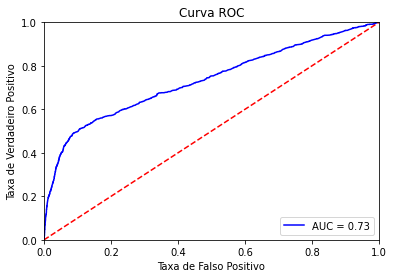

In [340]:
plt.title('Curva ROC')
plt.plot(taxa_falso_positivo,
         taxa_verdadeiro_positivo,
         'b',
         label='AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

Serializar o modelo

In [341]:
import pickle
import joblib

In [342]:
gb_grid

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': [2, 100],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(roc_auc_score))

In [344]:
# salvando o modelo para download

with open('gb_grid.pkl', 'wb') as modelo:
 pickle.dump(gb_grid, modelo)

In [346]:
# outra forma de salvar o modelo 

joblib.dump(gb_grid,'gb_grid_joblib.pkl')

['gb_grid_joblib.pkl']

Fazendo a leitura do modelo serializado 

In [347]:
modelo_pickle = pickle.load(open('gb_grid.pkl', 'rb'))

In [348]:
modelo_pickle

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': [2, 100],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(roc_auc_score))

In [349]:
modelo_joblib = joblib.load('gb_grid_joblib.pkl')

In [350]:
modelo_joblib

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_leaf': [2, 100],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200, 500],
                         'random_state': [42]},
             scoring=make_scorer(roc_auc_score))

Prevendo os valores usando o  modelo

In [352]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,difficulty
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,-1
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,4
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes,-1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,-1
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,-1


In [353]:
explicativas_modelagem.head()

,age,campaign,previous,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
0,49,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,37,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,78,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,36,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,59,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [355]:
teste_predicao = explicativas_modelagem.iloc[:5,:]
teste_predicao

,age,campaign,previous,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,difficulty_0,difficulty_1,difficulty_2,difficulty_4
0,49,4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,37,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,78,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,36,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,59,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [356]:
resultado_teste = modelo_joblib.predict(teste_predicao)

In [357]:
resultado_teste

array([0, 0, 1, 0, 0])

In [358]:
teste_predicao_target = df.iloc[:5,15]
teste_predicao_target

0     no
1     no
2    yes
3     no
4     no
Name: y, dtype: object

In [360]:
teste_predicao_target = var_resp.loc[:4]
teste_predicao_target

0    0
1    0
2    1
3    0
4    0
Name: y, dtype: int64

In [361]:
accuracy_score(teste_predicao_target, resultado_teste)

1.0